# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

In [3]:
print("tesla \n ",df_tesla.head(5))

tesla 
          MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0  2010-06-01                3           4.766
1  2010-07-01                3           3.988
2  2010-08-01                2           3.896
3  2010-09-01                2           4.082
4  2010-10-01                2           4.368


In [4]:
print("Tesla Search : ",df_tesla.shape)

Tesla Search :  (124, 3)


In [5]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [6]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [7]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


### Unemployment Data

In [8]:
print(df_unemployment.head(5))

     MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0  2004-01                      34     5.7
1  2004-02                      33     5.6
2  2004-03                      25     5.8
3  2004-04                      29     5.6
4  2004-05                      23     5.6


In [9]:
df_unemployment.shape

(181, 3)

In [10]:
df_unemployment.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

In [11]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [12]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()} ')

Largest value for "Unemployemnt Benefits" in Web Search: 100 


### Bitcoin

In [13]:
print(df_btc_price.shape)
print(df_btc_price.head(5))

(2204, 3)
         DATE       CLOSE      VOLUME
0  2014-09-17  457.334015  21056800.0
1  2014-09-18  424.440002  34483200.0
2  2014-09-19  394.795990  37919700.0
3  2014-09-20  408.903992  36863600.0
4  2014-09-21  398.821014  26580100.0


In [14]:
print(df_btc_search.shape)
print(df_btc_search.head(5))

(73, 2)
     MONTH  BTC_NEWS_SEARCH
0  2014-09                5
1  2014-10                4
2  2014-11                4
3  2014-12                4
4  2015-01                5


In [15]:
df_btc_search.columns

Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [16]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


# Data Cleaning

In [17]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [18]:
print(f'Missing values for BTC price?:{df_btc_price.isna().values.any()}')

Missing values for BTC price?:True


In [19]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


In [20]:
print(df_btc_price[df_btc_price.CLOSE.isna()])

            DATE  CLOSE  VOLUME
2148  2020-08-04    NaN     NaN


**Challenge**: Remove any missing values that you found. 

In [21]:
df_btc_price=df_btc_price.dropna()

In [22]:
print(f'Missing values for BTC price?:{df_btc_price.isna().values.any()}')

Missing values for BTC price?:False


### Convert Strings to DateTime Objects

In [23]:
df_tesla.MONTH=pd.to_datetime(df_tesla.MONTH)
df_btc_search.MONTH=pd.to_datetime(df_btc_search.MONTH)
df_unemployment.MONTH=pd.to_datetime(df_unemployment.MONTH)
df_btc_price.DATE=pd.to_datetime(df_btc_price.DATE)

In [24]:
df_tesla.MONTH.head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

In [25]:
df_btc_monthly=df_btc_price.resample('M',on='DATE').last()

In [26]:
print(df_btc_monthly.shape)
df_btc_monthly.head()

(73, 2)


,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


# Data Visualisation

## Tesla Stock Price v.s. Search Volume

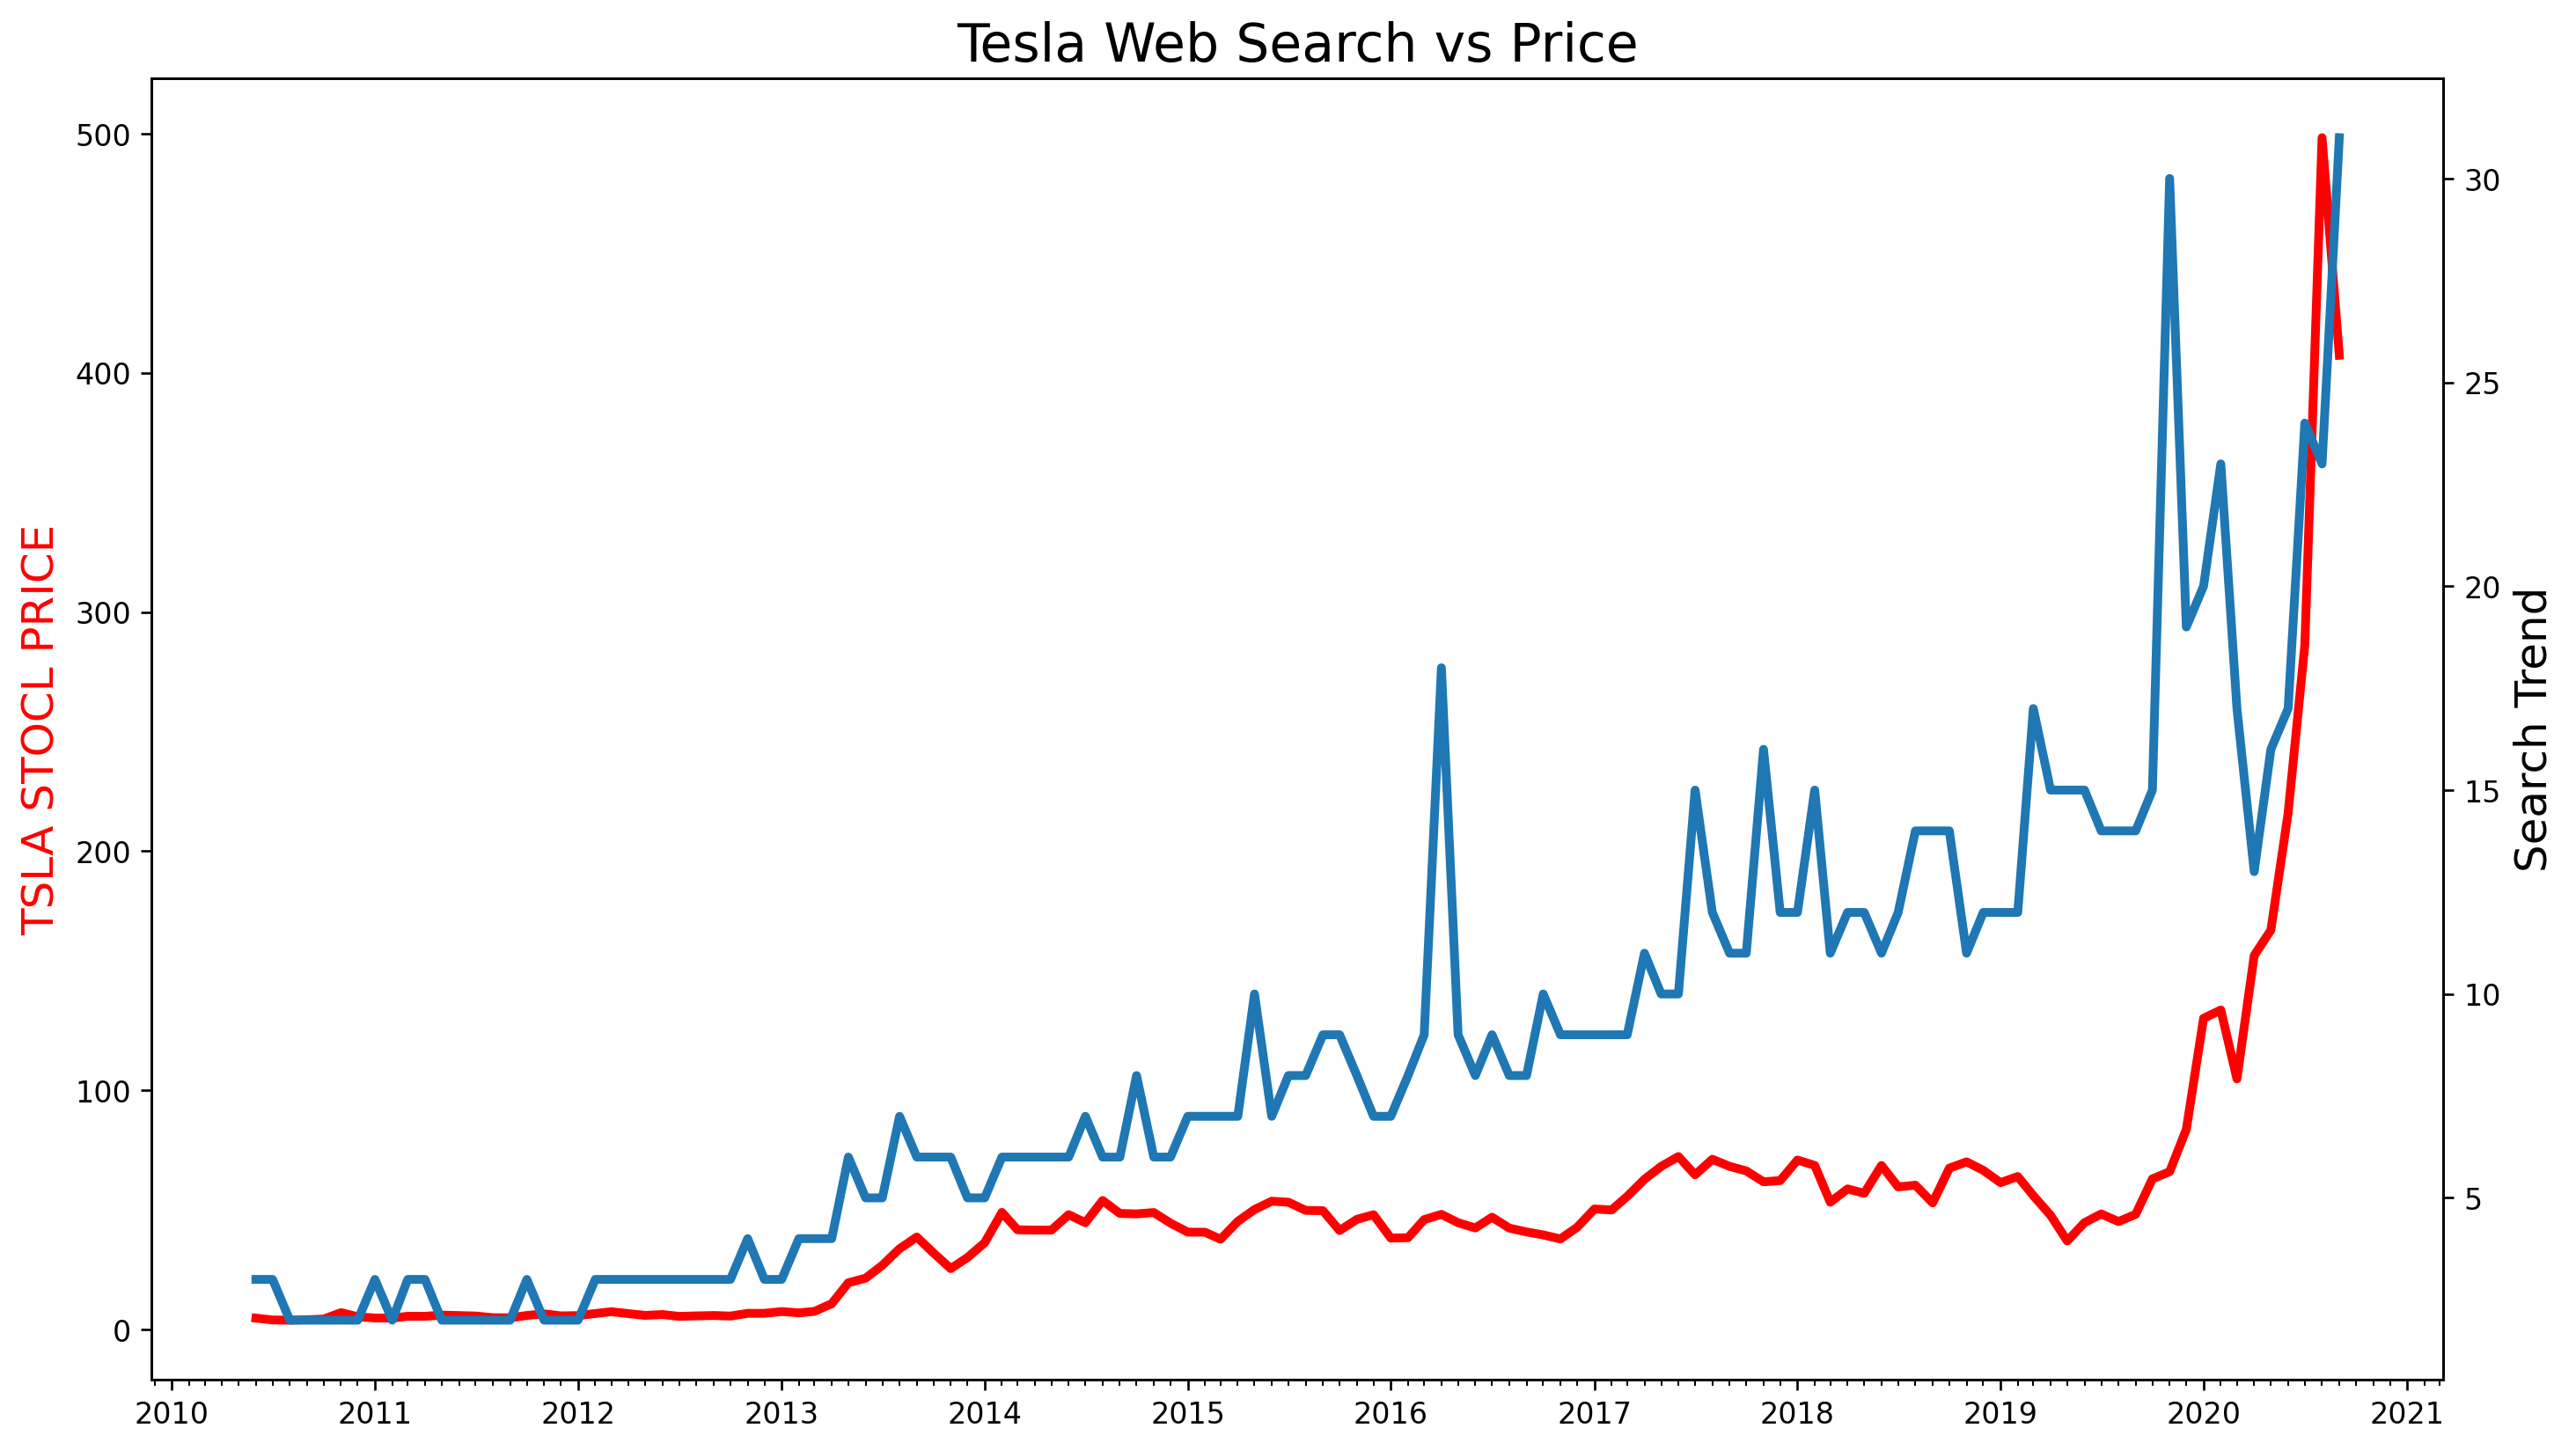

In [43]:
plt.figure(figsize=(14,8),dpi=240)
plt.title("Tesla Web Search vs Price",fontsize=18)

ax1 = plt.gca() 
ax2 = ax1.twinx()    
    
ax1.set_ylabel('TSLA STOCL PRICE',color='red',fontsize=15)
ax2.set_ylabel('Search Trend',fontsize=15)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE,color='red',linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH,linewidth=3)

plt.show()

In [29]:
# Register date converters to avoid warning messages
years=mdates.YearLocator()
months=mdates.MonthLocator()
years_fmt=mdates.DateFormatter('%Y')

In [30]:
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

## Bitcoin (BTC) Price v.s. Search Volume

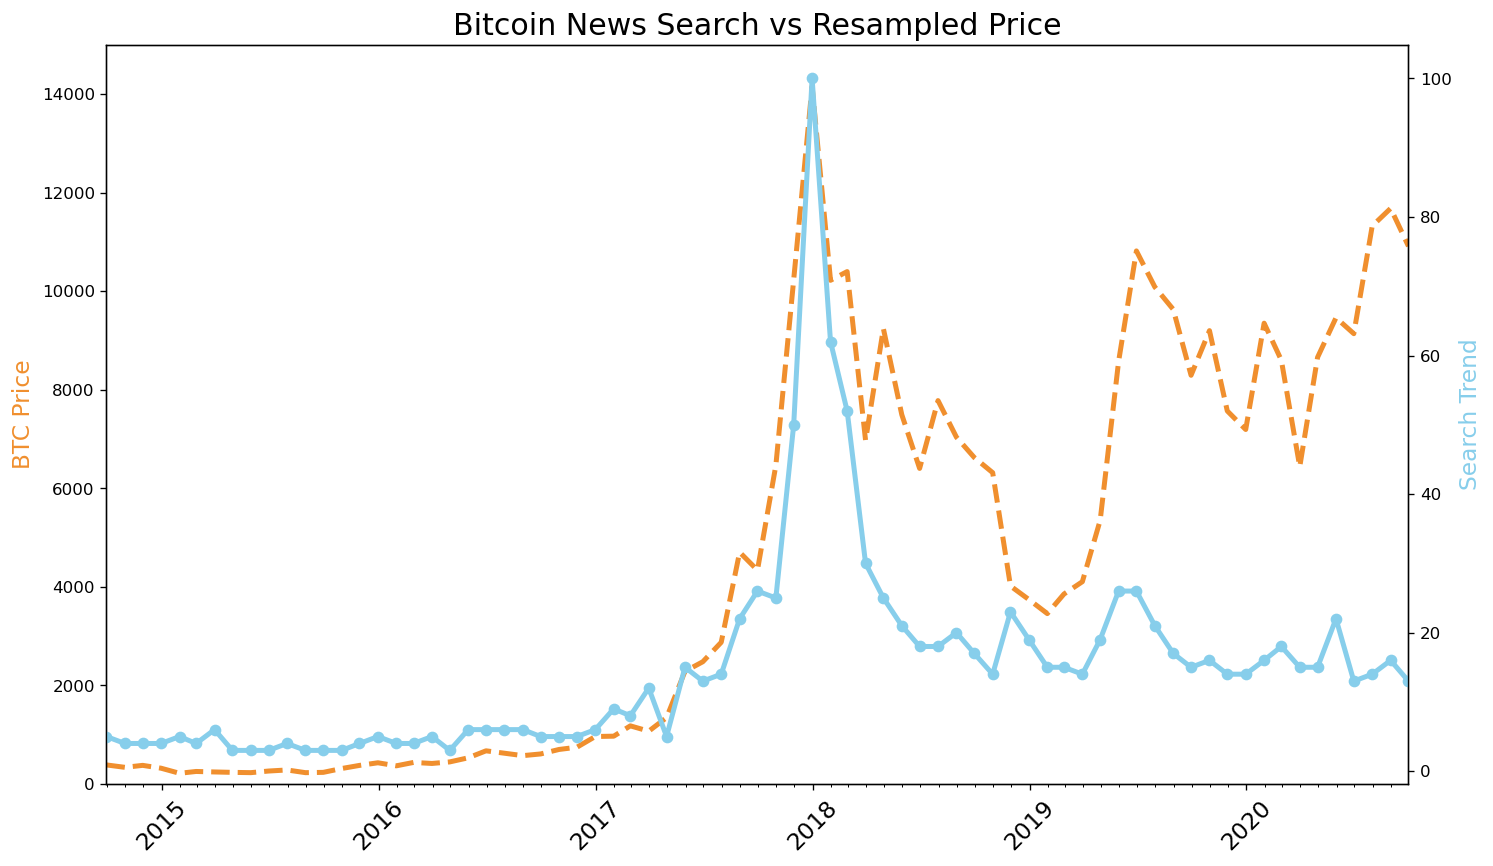

In [31]:
plt.figure(figsize=(14,8), dpi=120)
 
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('BTC Price', color='#F08F2E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])
 

ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, 
         color='#F08F2E', linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, 
         color='skyblue', linewidth=3, marker='o')
 
plt.show()


### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

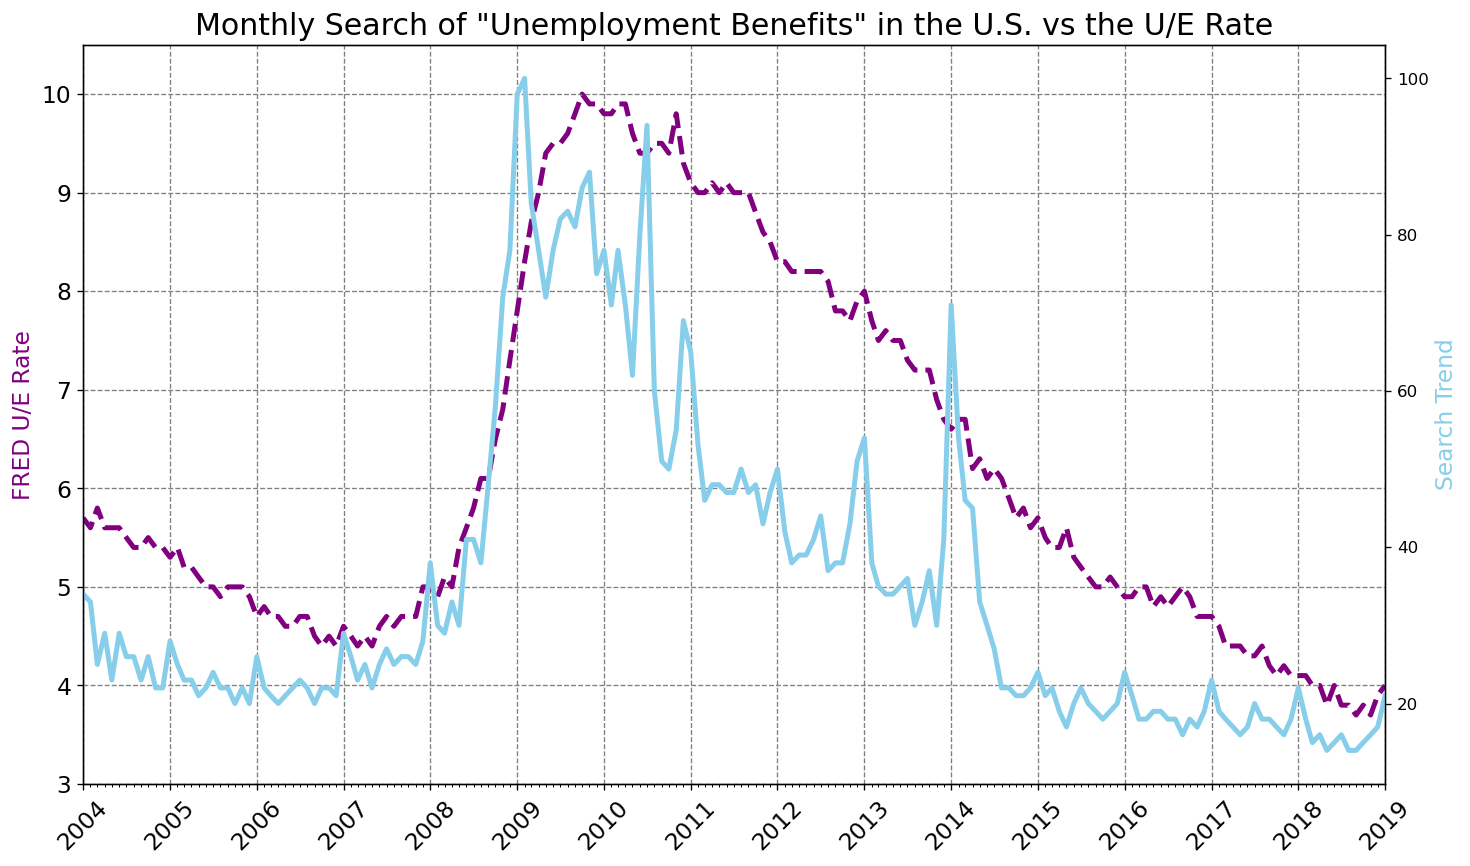

In [33]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

ax1.grid(color='grey', linestyle='--')
 
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, 
         color='purple', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, 
         color='skyblue', linewidth=3)
 
plt.show()


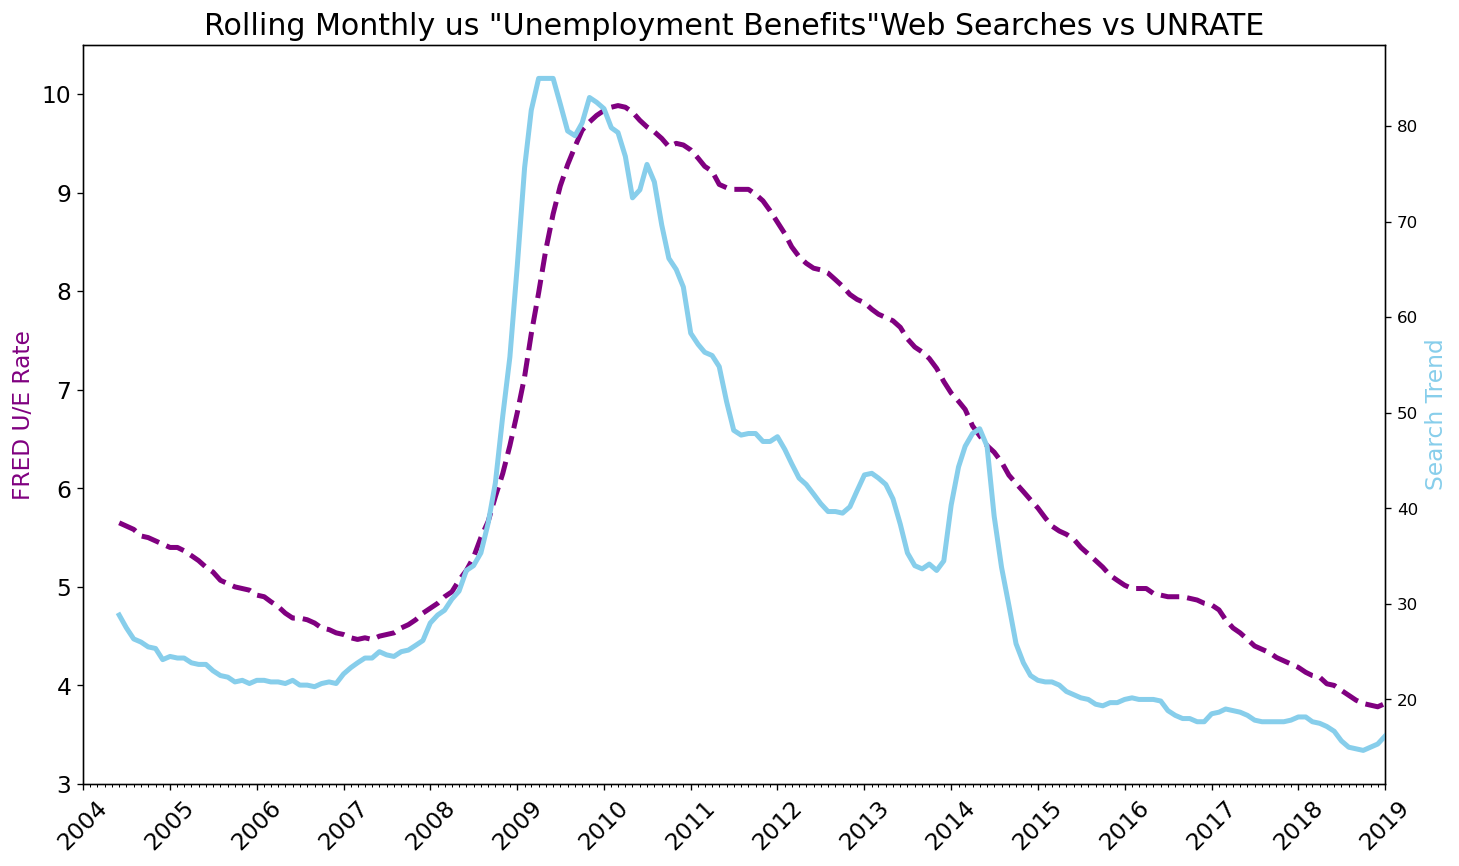

In [35]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly us "Unemployment Benefits"Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
  
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

# Change the dataset used
ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 
         color='purple', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 
         color='skyblue', linewidth=3)
 
plt.show()

### Including 2020 in Unemployment Charts

In [42]:
df_ue_2020=pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.MONTH=pd.to_datetime(df_ue_2020.MONTH)

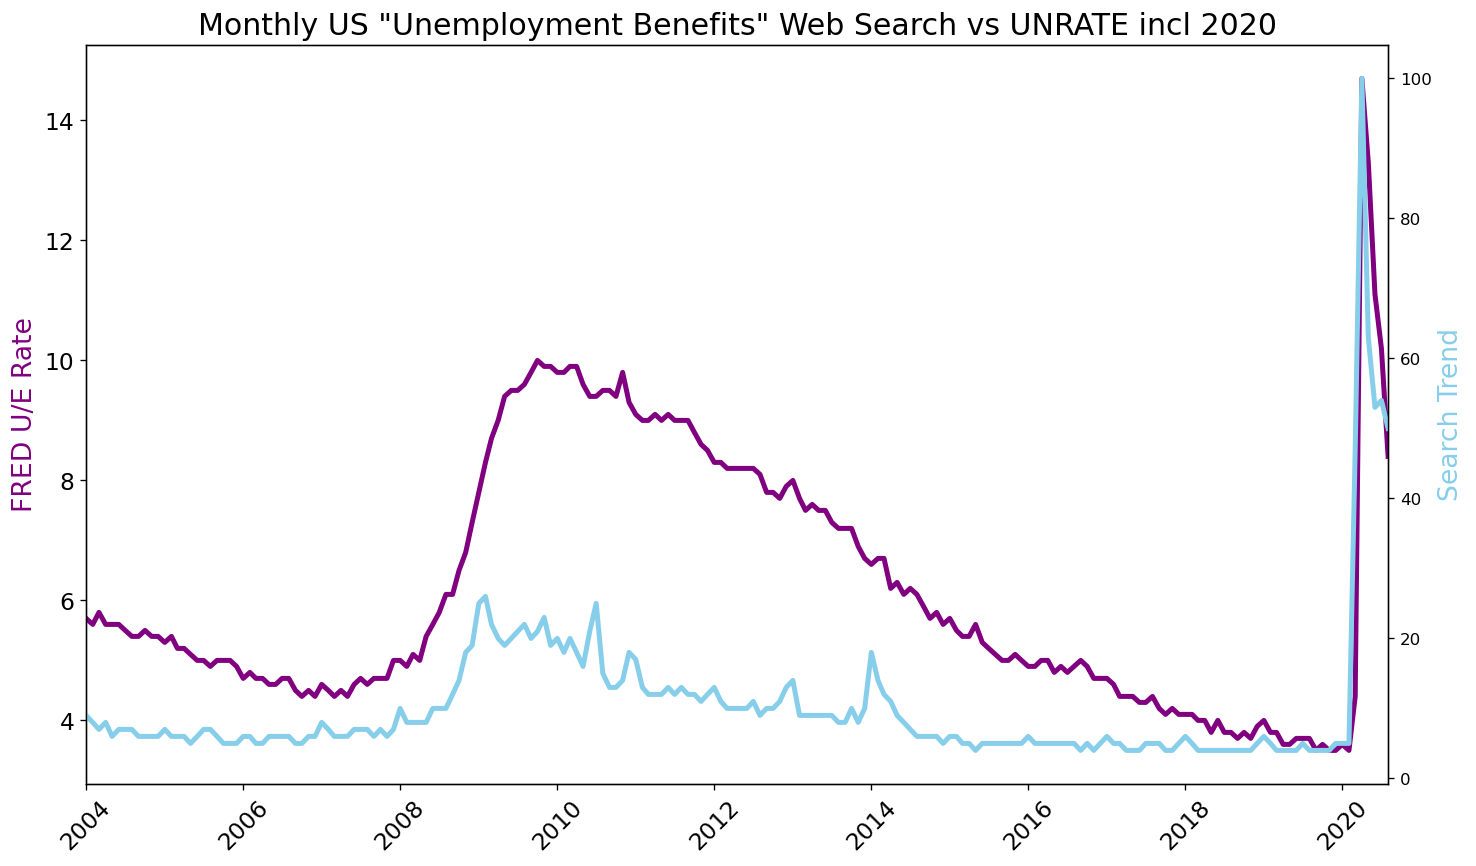

In [44]:
plt.figure(figsize=(14,8),dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14,rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)

ax1=plt.gca()
ax2=ax1.twinx()

ax1.set_ylabel('FRED U/E Rate',color='purple',fontsize=16)
ax2.set_ylabel('Search Trend',color='skyblue',fontsize=16)

ax1.set_xlim([df_ue_2020.MONTH.min(),df_ue_2020.MONTH.max()])
ax1.plot(df_ue_2020.MONTH,df_ue_2020.UNRATE, 'purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)
plt.show()